# Analyzing League of Legends Matches with Classification, Regression and Clustering

*COGS 118B Final Project by Jeff Jimenez*

## Imports and Dataset

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('Challenger_Ranked_Games.csv')
import matplotlib.pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (  
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    classification_report,
)

In [2]:
data

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4247263043,1323,0,1,0,0,0,0,0,0,...,68,73016,49832,533,64,12.8,138,8,38711,60463
1,4247155821,1317,1,0,0,0,1,0,2,0,...,8,44218,37136,571,59,11.8,134,3,24829,14105
2,4243963257,932,0,0,0,0,0,0,0,0,...,20,30797,35364,400,50,10.0,89,5,12589,45201
3,4241678498,2098,0,0,0,1,1,0,1,1,...,72,125866,70528,832,84,16.8,205,9,65312,88202
4,4241538868,2344,1,1,1,1,1,1,2,2,...,83,131536,74596,794,85,17.0,227,7,86431,64141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26899,4143231833,1468,0,1,0,0,0,0,1,0,...,40,75531,46558,478,64,12.8,141,6,48596,42733
26900,4157911901,970,0,1,1,0,1,0,3,0,...,31,99837,70177,455,72,14.4,136,11,15817,50217
26901,3764171638,1480,0,1,1,0,1,0,1,0,...,34,55214,48849,636,66,13.2,175,6,25448,27675
26902,4110201724,1837,1,1,0,0,1,0,3,0,...,29,88366,52625,660,70,14.0,168,5,25003,45455


In [3]:
missing_values = data.isnull().sum()
missing_values

gameId                     0
gameDuraton                0
blueWins                   0
blueFirstBlood             0
blueFirstTower             0
blueFirstBaron             0
blueFirstDragon            0
blueFirstInhibitor         0
blueDragonKills            0
blueBaronKills             0
blueTowerKills             0
blueInhibitorKills         0
blueWardPlaced             0
blueWardkills              0
blueKills                  0
blueDeath                  0
blueAssist                 0
blueChampionDamageDealt    0
blueTotalGold              0
blueTotalMinionKills       0
blueTotalLevel             0
blueAvgLevel               0
blueJungleMinionKills      0
blueKillingSpree           0
blueTotalHeal              0
blueObjectDamageDealt      0
redWins                    0
redFirstBlood              0
redFirstTower              0
redFirstBaron              0
redFirstDragon             0
redFirstInhibitor          0
redDragonKills             0
redBaronKills              0
redTowerKills 

## Logistic Regression

In [4]:
# Creating columns for kill and gold differences
data['Gold_Difference'] = data['blueTotalGold'] - data['redTotalGold']
data['Kill_Difference'] = data['blueKills'] - data['redKills']

# Features that are relevant toward predicting what influences a win
metrics = [
    'blueFirstBlood', 'blueFirstTower', 'blueFirstDragon', 'blueFirstBaron',
    'blueKills', 'blueDeath', 'blueAssist', 'blueTotalGold',
    'redKills', 'redDeath', 'redAssist', 'redTotalGold',
    'Gold_Difference', 'Kill_Difference'
]

X = data[metrics]
y = data['blueWins']

# Training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

log_model = LogisticRegression(max_iter=1000, random_state=23)
log_model.fit(X_train, y_train)

y_pred = log_model.predict(X_test)  # predicts 0 or 1 for class labels
y_prob = log_model.predict_proba(X_test)[:, 1]  # predicts the class 1 probabilities where blue wins

acc = accuracy_score(y_test, y_pred)
precision  = precision_score(y_test, y_pred)
recall =  recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
class_rep = classification_report(y_test, y_pred)


print("Classification Report:\n", class_rep)
print("Accuracy:", acc)
print("Precision:", precision)
print("Recall:", recall)
print("ROC-AUC:", roc_auc)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2662
           1       0.98      0.98      0.98      2719

    accuracy                           0.98      5381
   macro avg       0.98      0.98      0.98      5381
weighted avg       0.98      0.98      0.98      5381

Accuracy: 0.9791860249024344
Precision: 0.980110497237569
Recall: 0.9786686281721221
ROC-AUC: 0.9970603668593632


In [5]:
feat_importance =  np.abs(log_model.coef_[0])
feat_names = X_train.columns

feat_df = pd.DataFrame({'Feature': feat_names, 'Coefficient': feat_importance})
feat_df = feat_df.sort_values(by='Coefficient', ascending=False)
feat_df

,Feature,Coefficient
3,blueFirstBaron,0.989449
1,blueFirstTower,0.750981
0,blueFirstBlood,0.478070
2,blueFirstDragon,0.428254
9,redDeath,0.058766
8,redKills,0.047861
10,redAssist,0.025861
4,blueKills,0.025827
13,Kill_Difference,0.022034
6,blueAssist,0.018955


* Metrics such as the first Baron, Tower, First Blood and Dragon have strong influence on a match. Out of these 4, three of them are map objectives (Baron, Tower, Dragon).

* Metrics correlating to individual performance such as redDeath, redKills, redAssist, and  blueKills also have some influence but not as much as map objectives.

Logistic Regression Confusion Matrix:
 [[2608   54]
 [  58 2661]]


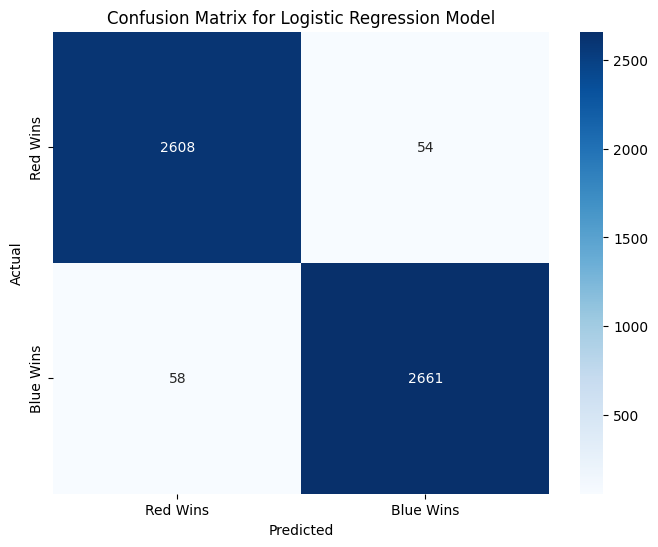

In [6]:
confuse_matrix = confusion_matrix(y_test, y_pred)
print('Logistic Regression Confusion Matrix:\n', confuse_matrix)
     
plt.figure(figsize=(8, 6))
sns.heatmap(confuse_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Red Wins', 'Blue Wins'], yticklabels=['Red Wins', 'Blue Wins'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()

## Logistic Regression with Subsets

In [7]:
# Exclude early game objectives
X_train['Gold_Difference'] = X_train['blueTotalGold'] - X_train['redTotalGold']
X_train['Kill_Difference'] = X_train['blueKills'] - X_train['redKills']
X_test['Gold_Difference'] = X_test['blueTotalGold'] - X_test['redTotalGold']
X_test['Kill_Difference'] = X_test['blueKills'] - X_test['redKills']

no_early_game_features = [
    'blueKills', 'redKills', 'blueDeath', 'redDeath',
    'blueAssist', 'redAssist', 'Gold_Difference', 'Kill_Difference'
]

# Subset the data
X_train_no_early = X_train[no_early_game_features]
X_test_no_early = X_test[no_early_game_features]

# Train the model
log_model_no_early = LogisticRegression(max_iter=1000, random_state=23)
log_model_no_early.fit(X_train_no_early, y_train)

# Make predictions and evaluate
y_pred_no_early = log_model_no_early.predict(X_test_no_early)
y_prob_no_early = log_model_no_early.predict_proba(X_test_no_early)[:, 1]


accuracy_no_early = accuracy_score(y_test, y_pred_no_early)
precision_no_early = precision_score(y_test, y_pred_no_early)
recall_no_early = recall_score(y_test, y_pred_no_early)
roc_auc_no_early = roc_auc_score(y_test, y_prob_no_early)
class_rep_no_early = classification_report(y_test, y_pred_no_early)


print("Classification Report:\n", class_rep_no_early)
print("Accuracy:", accuracy_no_early)
print("Precision:", precision_no_early)
print("Recall:", recall_no_early)
print("ROC-AUC:", roc_auc_no_early)

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2662
           1       0.98      0.98      0.98      2719

    accuracy                           0.98      5381
   macro avg       0.98      0.98      0.98      5381
weighted avg       0.98      0.98      0.98      5381

Accuracy: 0.9776993123954655
Precision: 0.9765309864319766
Recall: 0.979404192717911
ROC-AUC: 0.9970173990581348


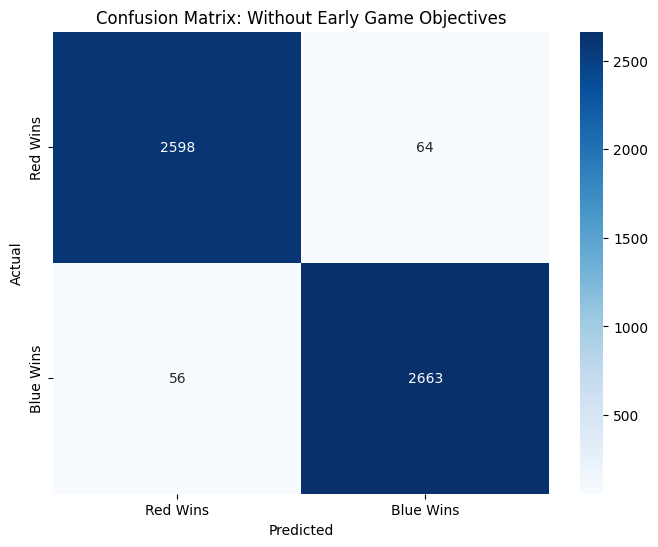

In [8]:
cm_no_early = confusion_matrix(y_test, y_pred_no_early)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_early, annot=True, fmt='d', cmap='Blues', xticklabels=['Red Wins', 'Blue Wins'], yticklabels=['Red Wins', 'Blue Wins'])
plt.title('Confusion Matrix: Without Early Game Objectives')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [9]:
no_derived_features = [
    'blueFirstBlood', 'blueFirstTower', 'blueFirstDragon', 'blueFirstBaron',
    'blueKills', 'redKills', 'blueDeath', 'redDeath',
    'blueAssist', 'redAssist'
]

# Subset the data
X_train_no_derived = X_train[no_derived_features]
X_test_no_derived = X_test[no_derived_features]

# Train the Logistic Regression model
log_model_no_derived = LogisticRegression(max_iter=1000, random_state=23)
log_model_no_derived.fit(X_train_no_derived, y_train)

# Make predictions and evaluate
y_pred_no_derived = log_model_no_derived.predict(X_test_no_derived)
y_prob_no_derived = log_model_no_derived.predict_proba(X_test_no_derived)[:, 1]

# Compute evaluation metrics
accuracy_no_derived = accuracy_score(y_test, y_pred_no_derived)
precision_no_derived = precision_score(y_test, y_pred_no_derived)
recall_no_derived = recall_score(y_test, y_pred_no_derived)
roc_auc_no_derived = roc_auc_score(y_test, y_prob_no_derived)
class_rep_no_derived = classification_report(y_test, y_pred_no_derived)

# Print results
print("\nWithout Derived Metrics:")
print("Classification Report:\n", class_rep_no_derived)
print("Accuracy:", accuracy_no_derived)
print("Precision:", precision_no_derived)
print("Recall:", recall_no_derived)
print("ROC-AUC:", roc_auc_no_derived)



Without Derived Metrics:
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      2662
           1       0.95      0.94      0.94      2719

    accuracy                           0.94      5381
   macro avg       0.94      0.94      0.94      5381
weighted avg       0.94      0.94      0.94      5381

Accuracy: 0.9442482809886639
Precision: 0.9458164393660154
Recall: 0.9437293122471497
ROC-AUC: 0.9846791465793348


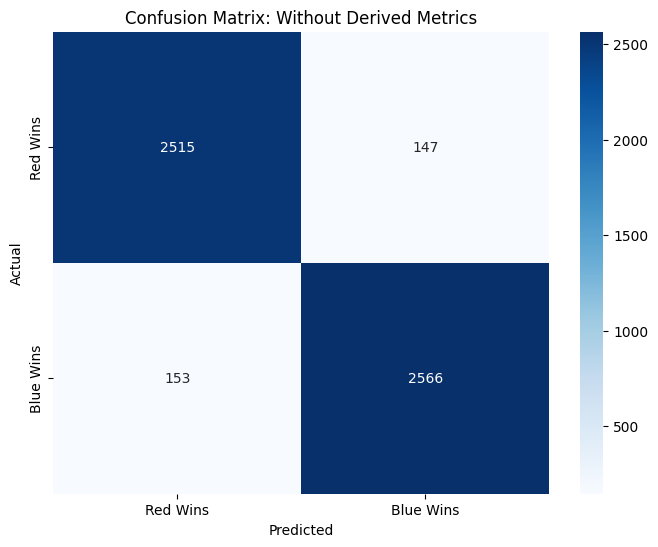

In [10]:
cm_no_derived = confusion_matrix(y_test, y_pred_no_derived)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_derived, annot=True, fmt='d', cmap='Blues', xticklabels=['Red Wins', 'Blue Wins'], yticklabels=['Red Wins', 'Blue Wins'])
plt.title('Confusion Matrix: Without Derived Metrics')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [11]:
# Exclude kills and deaths
no_kills_deaths_features = [
    'blueFirstBlood', 'blueFirstTower', 'blueFirstDragon', 'blueFirstBaron',
    'blueAssist', 'redAssist', 'Gold_Difference', 'Kill_Difference'
]

# Subset the data
X_train_no_kills = X_train[no_kills_deaths_features]
X_test_no_kills = X_test[no_kills_deaths_features]

# Train the Logistic Regression model
log_model_no_kills = LogisticRegression(max_iter=1000, random_state=23)
log_model_no_kills.fit(X_train_no_kills, y_train)

# Make predictions and evaluate
y_pred_no_kills = log_model_no_kills.predict(X_test_no_kills)
y_prob_no_kills = log_model_no_kills.predict_proba(X_test_no_kills)[:, 1]

# Compute evaluation metrics
accuracy_no_kills = accuracy_score(y_test, y_pred_no_kills)
precision_no_kills = precision_score(y_test, y_pred_no_kills)
recall_no_kills = recall_score(y_test, y_pred_no_kills)
roc_auc_no_kills = roc_auc_score(y_test, y_prob_no_kills)
class_rep_no_kills = classification_report(y_test, y_pred_no_kills)

# Print results
print("\nWithout Kills and Deaths:")
print("Classification Report:\n", class_rep_no_kills)
print("Accuracy:", accuracy_no_kills)
print("Precision:", precision_no_kills)
print("Recall:", recall_no_kills)
print("ROC-AUC:", roc_auc_no_kills)



Without Kills and Deaths:
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2662
           1       0.98      0.98      0.98      2719

    accuracy                           0.98      5381
   macro avg       0.98      0.98      0.98      5381
weighted avg       0.98      0.98      0.98      5381

Accuracy: 0.9803010592826612
Precision: 0.9808612440191388
Recall: 0.9801397572636998
ROC-AUC: 0.9971154927522576


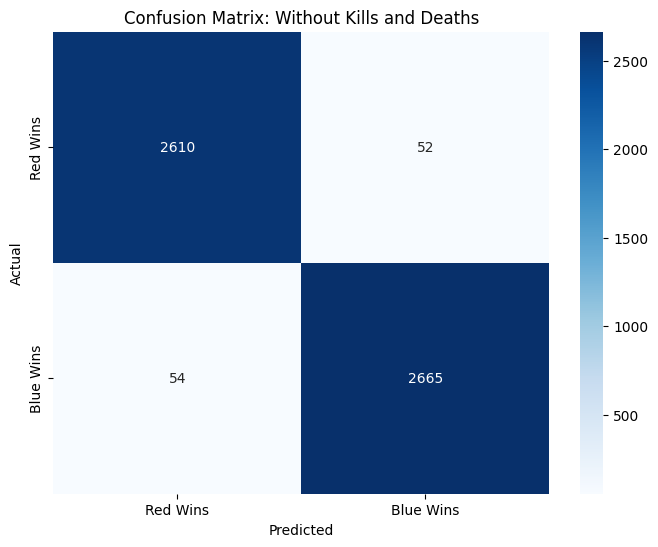

In [12]:
cm_no_kills = confusion_matrix(y_test, y_pred_no_kills)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_no_kills, annot=True, fmt='d', cmap='Blues', xticklabels=['Red Wins', 'Blue Wins'], yticklabels=['Red Wins', 'Blue Wins'])
plt.title('Confusion Matrix: Without Kills and Deaths')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Graph Visualizing Classification Report Metrics for Each Classifier

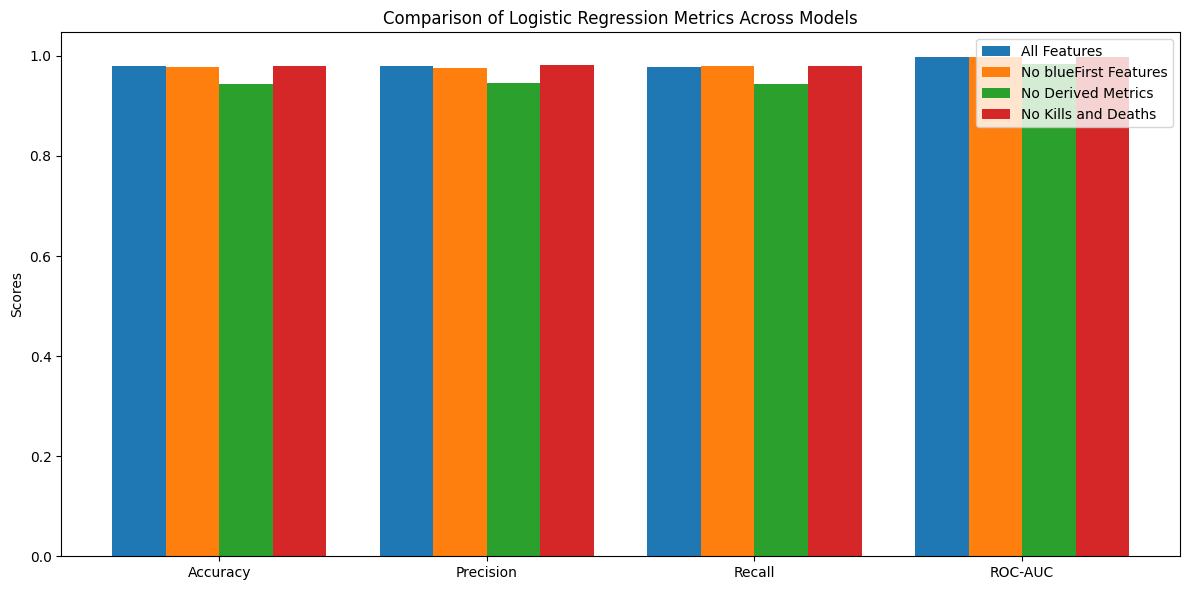

In [13]:
metrics = ['Accuracy', 'Precision', 'Recall', 'ROC-AUC']
all_metrics = {
    'All Features': [0.9791860249024344, 0.980110497237569, 0.9786686281721221, 0.9970603668593632],
    'No blueFirst Features': [0.9776993123954655, 0.9765309864319766, 0.979404192717911, 0.9970173990581348],
    'No Derived Metrics': [0.9442482809886639, 0.9458164393660154, 0.9437293122471497, 0.9846791465793348],
    'No Kills and Deaths': [0.9803010592826612, 0.9808612440191388, 0.9801397572636998, 0.9971154927522576]
}

x = np.arange(len(metrics))  # label locations
width = 0.2  # bar width

fig, ax = plt.subplots(figsize=(12, 6))

for i, (model, values) in enumerate(all_metrics.items()):
    ax.bar(x + i * width, values, width, label=model)

# Add labels, title, and legend
ax.set_xticks(x + width * (len(all_metrics) - 1) / 2)
ax.set_xticklabels(metrics)
ax.set_ylabel('Scores')
ax.set_title('Comparison of Logistic Regression Metrics Across Models')
ax.legend()

plt.tight_layout()
plt.show()

## Random Forest

In [13]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=23)
random_forest.fit(X_train, y_train)

y_rf_pred = random_forest.predict(X_test)
y_rf_prob = random_forest.predict_proba(X_test)[:, 1]

rf_acc = accuracy_score(y_test, y_rf_pred)
rf_precision = precision_score(y_test, y_rf_pred)
rf_recall = recall_score(y_test, y_rf_pred)
rf_roc_auc = roc_auc_score(y_test, y_rf_prob)
rf_class_rep = classification_report(y_test, y_rf_pred)

print("Random Forest Classification Report:\n", rf_class_rep)
print("Accuracy:", rf_acc)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("ROC-AUC:", rf_roc_auc)

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      2662
           1       0.98      0.98      0.98      2719

    accuracy                           0.98      5381
   macro avg       0.98      0.98      0.98      5381
weighted avg       0.98      0.98      0.98      5381

Accuracy: 0.979929381155919
Precision: 0.9780300256316368
Recall: 0.9823464509010665
ROC-AUC: 0.9974547449577769


In [14]:
rf_feat_importance = random_forest.feature_importances_

rf_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': rf_feat_importance
}).sort_values(by='Coefficient', ascending=False)
rf_importance

,Feature,Coefficient
12,Gold_Difference,0.409374
13,Kill_Difference,0.243043
8,redKills,0.069050
4,blueKills,0.063616
5,blueDeath,0.046974
9,redDeath,0.038945
10,redAssist,0.030920
6,blueAssist,0.030674
7,blueTotalGold,0.026570
11,redTotalGold,0.017013


* This shows gold difference and kill difference are nonlinear variables that have strong influences on the outcome of a game.
* Gold differences in League of Legends allow players to purchase more items and to become stronger.
* Kill differences in League of Legends matter as kills gives a numbers advantage, gold, and more control of the map, leading to control over objectives such as towers, baron, and dragon.

Random Forest Confusion Matrix:
 [[2602   60]
 [  48 2671]]


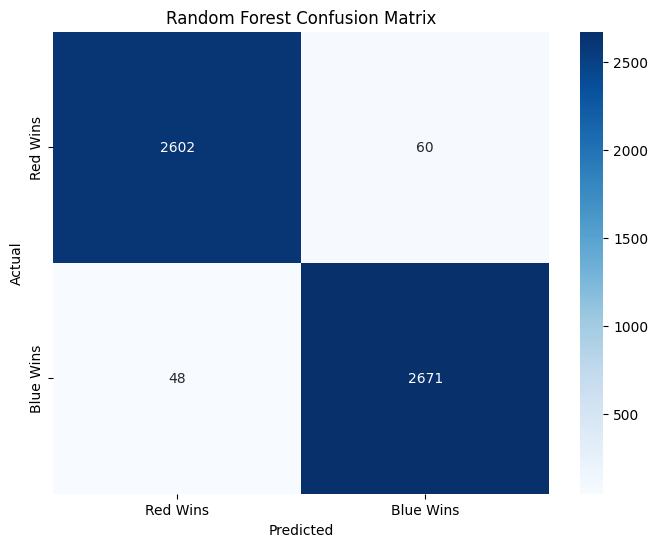

In [15]:
rf_confuse_matrix = confusion_matrix(y_test, y_rf_pred)
print('Random Forest Confusion Matrix:\n', rf_confuse_matrix)

plt.figure(figsize=(8, 6))
sns.heatmap(rf_confuse_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Red Wins', 'Blue Wins'], yticklabels=['Red Wins', 'Blue Wins'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()

## Random Forest Regression

In [16]:
# Uses regression to predict game duration
X_rf_reg = data[metrics]
y_rf_reg = data['gameDuraton']

X_rf_reg_train, X_rf_reg_test, y_rf_reg_train, y_rf_reg_test = train_test_split(X_rf_reg, y_rf_reg, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=23)
rf_regressor.fit(X_rf_reg_train, y_rf_reg_train)

y_rf_reg_pred = rf_regressor.predict(X_rf_reg_test)

mae = mean_absolute_error(y_rf_reg_test, y_rf_reg_pred)
rmse = np.sqrt(mean_squared_error(y_rf_reg_test, y_rf_reg_pred))

mae, rmse

(53.92146255342873, 97.95493644320469)

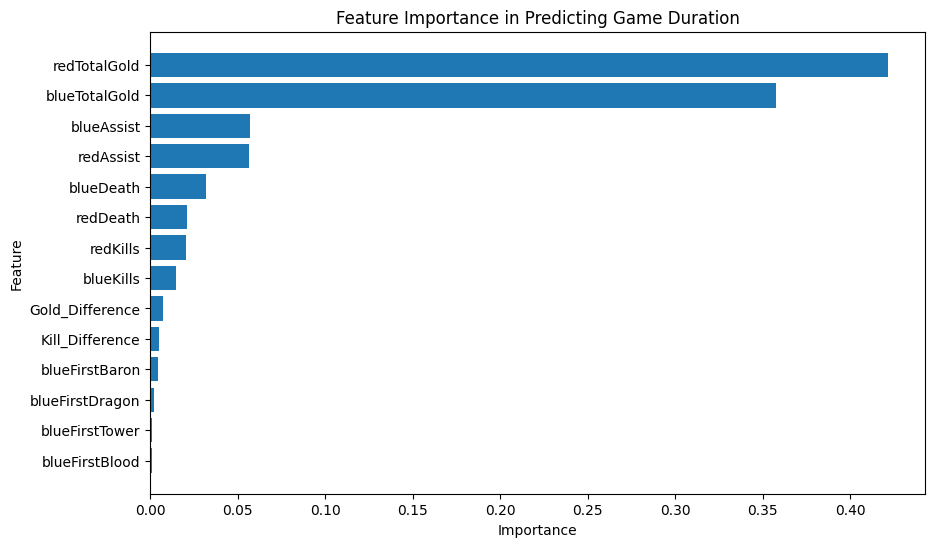

In [17]:
rf_important = rf_regressor.feature_importances_
rf_important_feats = X_rf_reg.columns
rf_importancedf = pd.DataFrame({
    'Feature': rf_important_feats,
    'Importance': rf_important
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(rf_importancedf['Feature'], rf_importancedf['Importance'], align='center')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance in Predicting Game Duration')
plt.show()


## Regression with Subsets

In [18]:
subsets = {
    "No Early Game (blueFirst*)": [
        'blueKills', 'blueDeath', 'blueAssist', 'blueTotalGold',
        'redKills', 'redDeath', 'redAssist', 'redTotalGold',
        'Gold_Difference', 'Kill_Difference'
    ],
    "Kills and Gold Only": [
        'blueKills', 'redKills', 'blueTotalGold', 'redTotalGold',
        'Gold_Difference', 'Kill_Difference'
    ],
    "No Derived Metrics": [
        'blueFirstBlood', 'blueFirstTower', 'blueFirstDragon', 'blueFirstBaron',
        'blueKills', 'blueDeath', 'blueAssist', 'blueTotalGold',
        'redKills', 'redDeath', 'redAssist', 'redTotalGold'
    ]
}

In [19]:
subset_results = []

y = data['gameDuraton']

for sub_name, feature_list in subsets.items():
    # Prepare data
    X_subset = data[feature_list]  # Use feature list instead of subset name
    X_train, X_test, y_train, y_test = train_test_split(X_subset, y, test_size=0.2, random_state=42)

    # Train Random Forest Regressor
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Append results
    subset_results.append({'Features': sub_name, 'MAE': mae, 'RMSE': rmse})

In [20]:
subset_results_df = pd.DataFrame(subset_results)
subset_results_df

,Features,MAE,RMSE
0,No Early Game (blueFirst*),54.605633,98.826123
1,Kills and Gold Only,67.046789,125.284489
2,No Derived Metrics,53.783949,97.095272


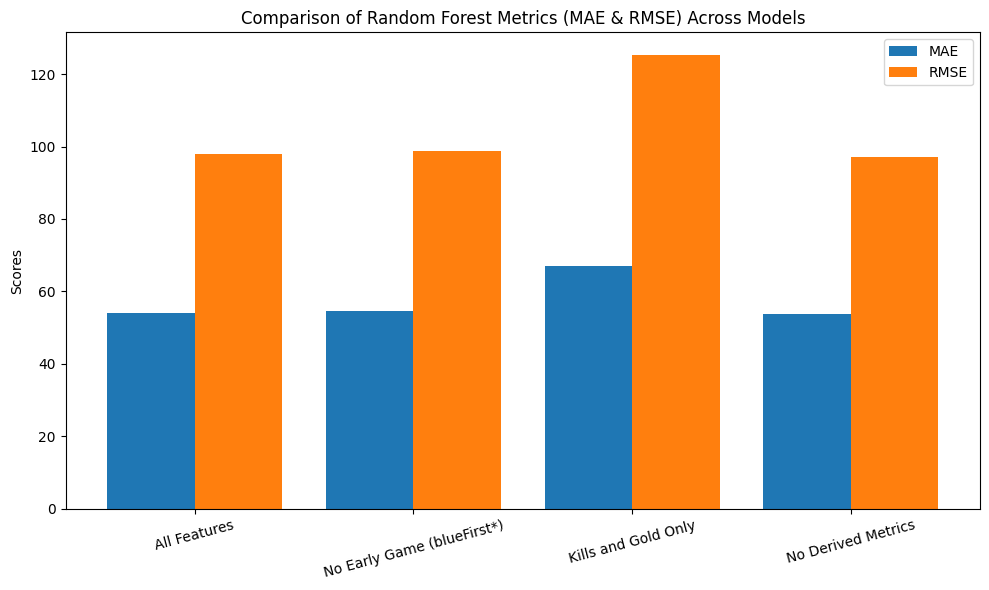

In [14]:
models = ['All Features', 'No Early Game (blueFirst*)', 'Kills and Gold Only', 'No Derived Metrics']
mae_values = [53.92146255342873, 54.605633, 67.046789, 53.783949]
rmse_values = [97.95493644320469, 98.826123, 125.284489, 97.095272]

# Plot bar charts for MAE and RMSE
x = np.arange(len(models))  # label locations
width = 0.4  # bar width

# MAE plot
plt.figure(figsize=(10, 6))
plt.bar(x - width / 2, mae_values, width, label='MAE')
plt.bar(x + width / 2, rmse_values, width, label='RMSE')

# Add labels, title, and legend
plt.xticks(x, models, rotation=15)
plt.ylabel('Scores')
plt.title('Comparison of Random Forest Metrics (MAE & RMSE) Across Models')
plt.legend()
plt.tight_layout()
plt.show()

* In the first subset, leaving out blueFirst features does not reduce the model's performance by much, it does seem to be slightly slower
* In the second subset, focusing on only kills and gold differences reduces the model's performance
* In the last subset, removing kills and gold differences made the performance slightly better

In [21]:
def feat_importance_graph(sub_name, features, data, rf_params):
    X = data[features]
    y = data['gameDuraton']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train Random Forest Regressor
    rf_regressor = RandomForestRegressor(**rf_params)
    rf_regressor.fit(X_train, y_train)

    # Feature importance graph
    rf_important_feats = features
    rf_importancedf = pd.DataFrame({
        'Feature': rf_important_feats,
        'Importance': rf_regressor.feature_importances_
    }).sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.barh(rf_importancedf['Feature'], rf_importancedf['Importance'], align='center')
    plt.gca().invert_yaxis()
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(f'Feature Importance - {sub_name}')
    plt.show()

In [22]:
rf_params = {
    "n_estimators": 50,  
    "random_state": 42   
}

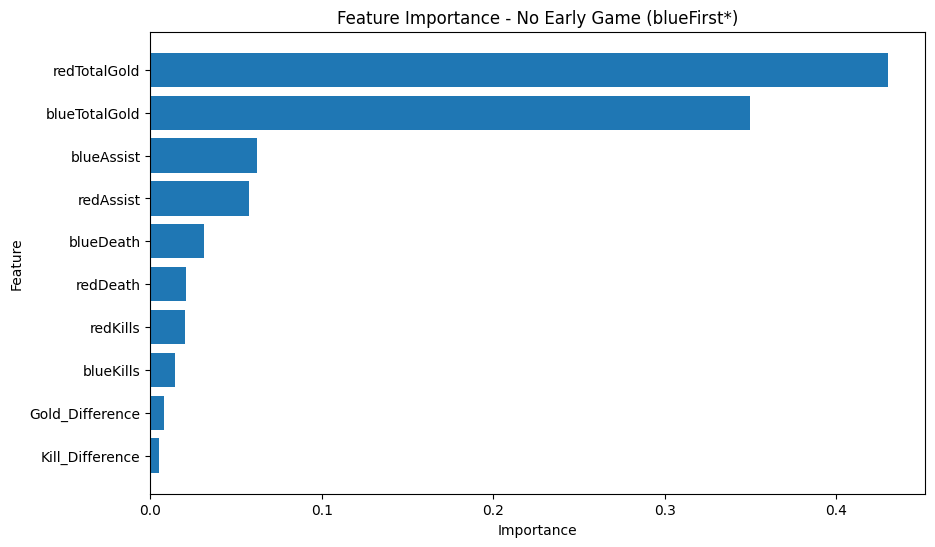

In [23]:
feat_importance_graph("No Early Game (blueFirst*)", subsets["No Early Game (blueFirst*)"], data, rf_params)

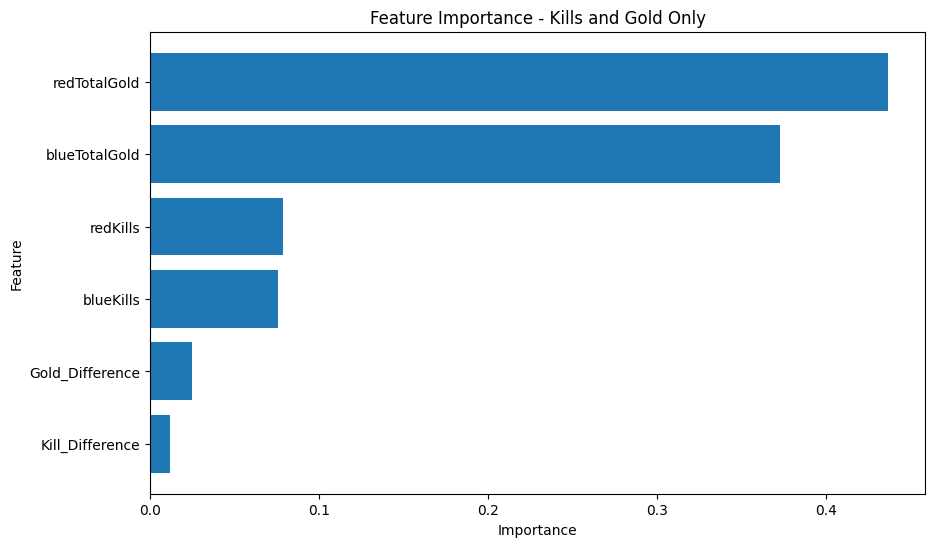

In [24]:
feat_importance_graph("Kills and Gold Only", subsets["Kills and Gold Only"], data, rf_params)

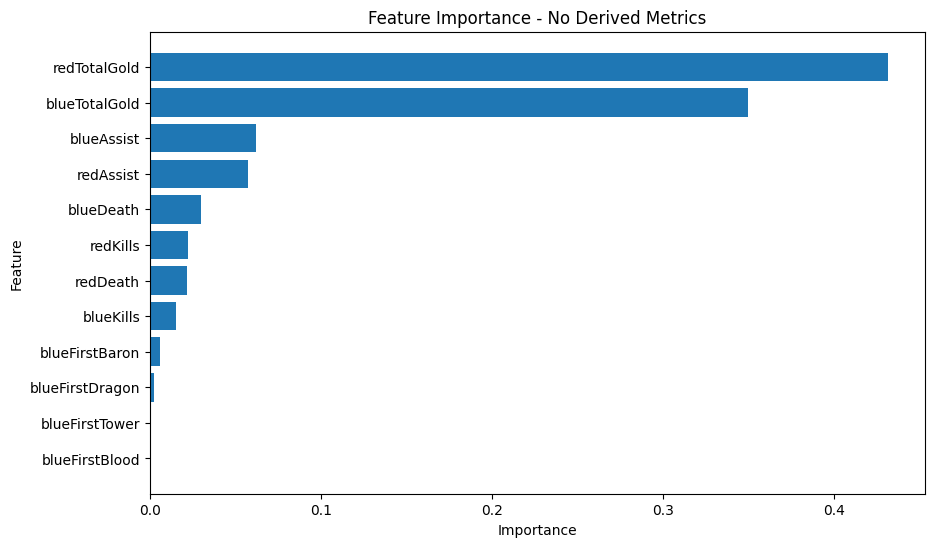

In [25]:
feat_importance_graph("No Derived Metrics", subsets["No Derived Metrics"], data, rf_params)

## K-Means Clustering (with PCA)

In [26]:
# scaler
scaler = StandardScaler()
X_scale = scaler.fit_transform(X)

# pca
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scale)

# k means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scale)

cluster_summary = pd.DataFrame({
    'Cluster': clusters,
    'Gold_Difference': data['Gold_Difference'],
    'Kill_Difference': data['Kill_Difference']
}).groupby('Cluster').mean()


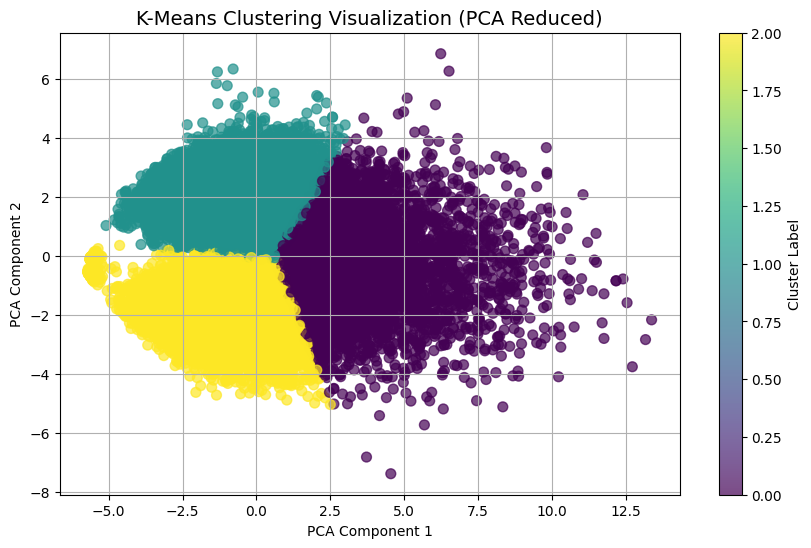

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=50, alpha=0.7)
plt.title('K-Means Clustering Visualization (PCA Reduced)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.grid(True)
plt.show()

In [28]:
cluster_summary

,Gold_Difference,Kill_Difference
Cluster,,
0,-700.576699,-0.726214
1,9485.998184,13.040134
2,-9356.324496,-12.633103


* Cluster 0 (purple) seems to represent games that are even in gold difference and kill difference
* Cluster 1 (blue) seems to represent games with the blue team winning strongly
* Cluster 2 (yellow) seems to represent games with the red team winning strongly